Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [45]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [46]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [47]:
# # Unzipping the CNN data
!unzip -uq "gdrive/MyDrive/CNN_assignment.zip" -d "gdrive/MyDrive/CNN_Data"

In [48]:
# For google colab
path_to_train_directory = "gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
path_to_test_directory = "gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

In [49]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(path_to_train_directory)
data_dir_test = pathlib.Path(path_to_test_directory)

In [50]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [51]:
batch_size = 32
img_height = 180
img_width = 180

#### Use 80% of the images for training, and 20% for validation.

In [52]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# train_ds = ##todo

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset="training",
    interpolation='bilinear', follow_links=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [53]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset="validation",
    interpolation='bilinear', follow_links=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [54]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [55]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

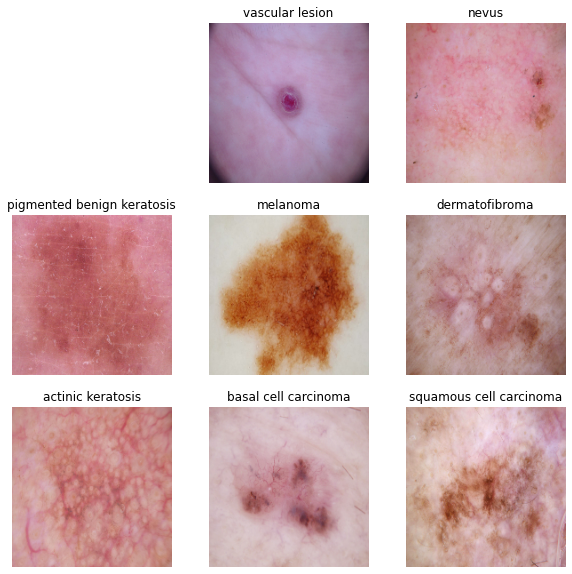

In [56]:
plt.figure(figsize=(10, 10))
# i=0;
n=0;
labels_taken=[]
for images, labels in train_ds.take(1):
    # print(labels)
    for i in range(32):
        if(labels[i] not in labels_taken):
            ax = plt.subplot(3, 3, n + 2)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            n+=1
            labels_taken.append(labels[i])

In [57]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [58]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [59]:
### Your code goes here
# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [60]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [61]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [62]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

### Train the model

In [63]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 85ms/step - loss: 2.0843 - accuracy: 0.2501 - val_loss: 1.8520 - val_accuracy: 0.3647
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6864 - accuracy: 0.3954 - val_loss: 1.4772 - val_accuracy: 0.4989
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.5377 - accuracy: 0.4711 - val_loss: 1.4228 - val_accuracy: 0.5369
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3127 - accuracy: 0.5492 - val_loss: 1.3978 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2162 - accuracy: 0.5838 - val_loss: 1.4483 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2101 - accuracy: 0.5911 - val_loss: 1.3238 - val_accuracy: 0.5638
Epoch 7/20
56/56 [==============================] - 1s 20ms/step - loss: 1.0667 - accuracy: 0.6128 - val_loss: 1.4471 - val_accuracy: 0.5145
Epoch 8/20
5

### Visualizing training results

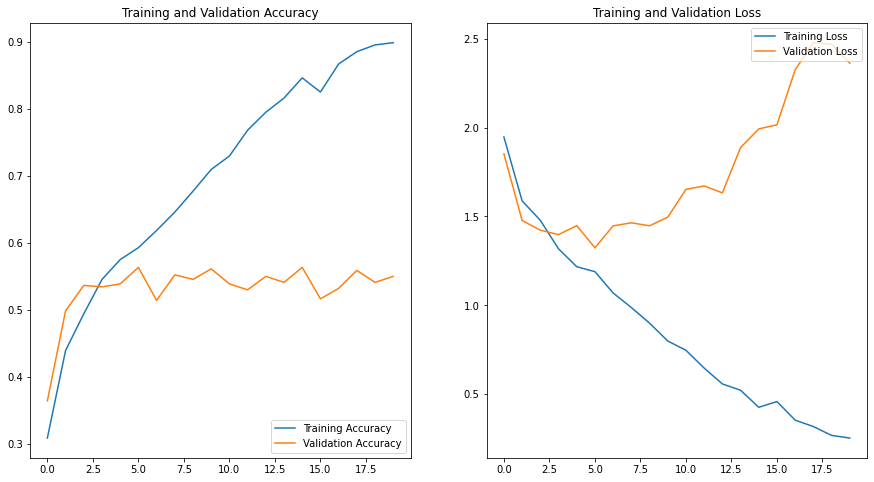

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [65]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomFlip("vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

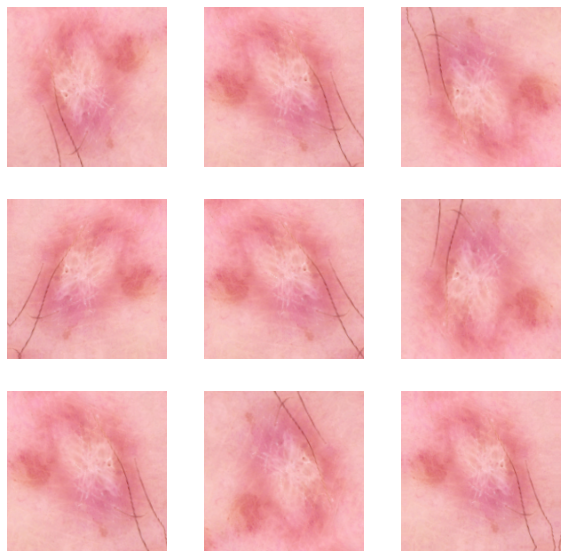

In [66]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [67]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


### Compiling the model

In [68]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

### Training the model

In [70]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 32ms/step - loss: 2.1185 - accuracy: 0.1935 - val_loss: 1.9299 - val_accuracy: 0.2864
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.8820 - accuracy: 0.2927 - val_loss: 1.7239 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.6965 - accuracy: 0.3948 - val_loss: 1.5290 - val_accuracy: 0.4653
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4609 - accuracy: 0.4861 - val_loss: 1.4147 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.4090 - accuracy: 0.5035 - val_loss: 1.5539 - val_accuracy: 0.4698
Epoch 6/20
56/56 [==============================] - 2s 27ms/step - loss: 1.4147 - accuracy: 0.4994 - val_loss: 1.3778 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 2s 27ms/step - loss: 1.3897 - accuracy: 0.5037 - val_loss: 1.4018 - val_accuracy: 0.5213
Epoch 8/20
56

### Visualizing the results

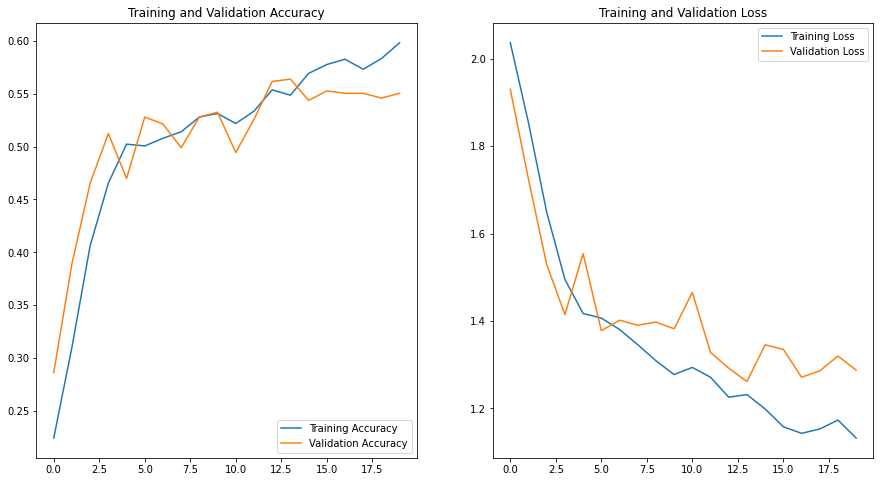

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
Observations
There seems to be overfitting  
the learning has become static and does not change 
loss is non linearly decreasing 
the train and validation accuracies are very low 

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [72]:
from glob import glob
old_path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
old_path_list

['gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030143.jpg',
 'gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029840.jpg',
 'gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027536.jpg',
 'gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028990.jpg',
 'gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029025.jpg',
 'gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029713.jpg',
 'gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029141.jpg',
 'gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collabora

In [73]:
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*' ,'*.jpg'))]
lesion_list_old

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [74]:
dataframe_dict_old= dict(zip(old_path_list, lesion_list_old))

In [75]:
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])

In [76]:
original_df.Label.value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- **The seborrheic keratosis has least number of samples, which is 77 and accounts for just around 3% of data.**

#### - Which classes dominate the data in terms proportionate number of samples?
- **The classes "pigmented benign keratosis" and "melanoma" dominate the data.  Together they have 40% of data proportion.**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [77]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [78]:
path_to_training_dataset = path_to_train_directory

In [79]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F92E633C690>: 100%|██████████| 500/500 [00:18<00:00, 27.08 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F92E6305250>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F92E6320B90>: 100%|██████████| 500/500 [00:18<00:00, 26.75 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F92E6307CD0>: 100%|██████████| 500/500 [00:19<00:00, 26.18 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F92E63059D0>: 100%|██████████| 500/500 [01:33<00:00,  5.37 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F92E636F990>:   0%|          | 2/500 [00:00<01:14,  6.67 Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7F92E633DD90>: 100%|██████████| 500/500 [01:18<00:00,  6.38 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F92E60B2410>:   0%|          | 1/500 [00:00<01:02,  8.03 Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F92E6359510>: 100%|██████████| 500/500 [00:19<00:00, 26.23 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F92DCFA35D0>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F933B6B6D50>: 100%|██████████| 500/500 [00:19<00:00, 25.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F933B5E3210>: 100%|██████████| 500/500 [00:19<00:00, 25.78 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [80]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [81]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list_new

In [82]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

In [83]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [84]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [85]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [86]:
batch_size = 32
img_height = 180
img_width = 180
num_classes=9

#### **Todo:** Create a training dataset

In [87]:
# data_dir_train=path_to_train_directory
data_dir_train=path_to_train_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [88]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [89]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [90]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [91]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomFlip("vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same'),
  # layers.BatchNormalization(momentum=0.9),
  layers.Activation('relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.1),

  layers.Conv2D(64, 3, padding='same'),
  # layers.BatchNormalization(momentum=0.9),
  layers.Activation('relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Conv2D(128, 3, padding='same'),
  # layers.BatchNormalization(momentum=0.9),
  layers.Activation('relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Dropout(0.2),

  layers.Flatten(),

  layers.Dense(256),
  layers.Activation('relu'),
  layers.Dropout(0.2),
  layers.Dense(128),
  layers.Activation('relu'),
  layers.Dense(num_classes, activation='softmax')
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [92]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 64)       

#### **Todo:**  Train your model

In [93]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 43s 83ms/step - loss: 2.3357 - accuracy: 0.1250 - val_loss: 2.1893 - val_accuracy: 0.1359
Epoch 2/50
169/169 [==============================] - 7s 40ms/step - loss: 2.1774 - accuracy: 0.1455 - val_loss: 2.0560 - val_accuracy: 0.2071
Epoch 3/50
169/169 [==============================] - 7s 40ms/step - loss: 1.9127 - accuracy: 0.2635 - val_loss: 1.5440 - val_accuracy: 0.4128
Epoch 4/50
169/169 [==============================] - 7s 40ms/step - loss: 1.5360 - accuracy: 0.4204 - val_loss: 1.4573 - val_accuracy: 0.4254
Epoch 5/50
169/169 [==============================] - 7s 39ms/step - loss: 1.4457 - accuracy: 0.4320 - val_loss: 1.4486 - val_accuracy: 0.4469
Epoch 6/50
169/169 [==============================] - 7s 40ms/step - loss: 1.4370 - accuracy: 0.4352 - val_loss: 1.3283 - val_accuracy: 0.4781
Epoch 7/50
169/169 [==============================] - 7s 40ms/step - loss: 1.3322 - accuracy: 0.4781 - val_loss: 1.2205 - val_accuracy: 0.529

#### **Todo:**  Visualize the model results

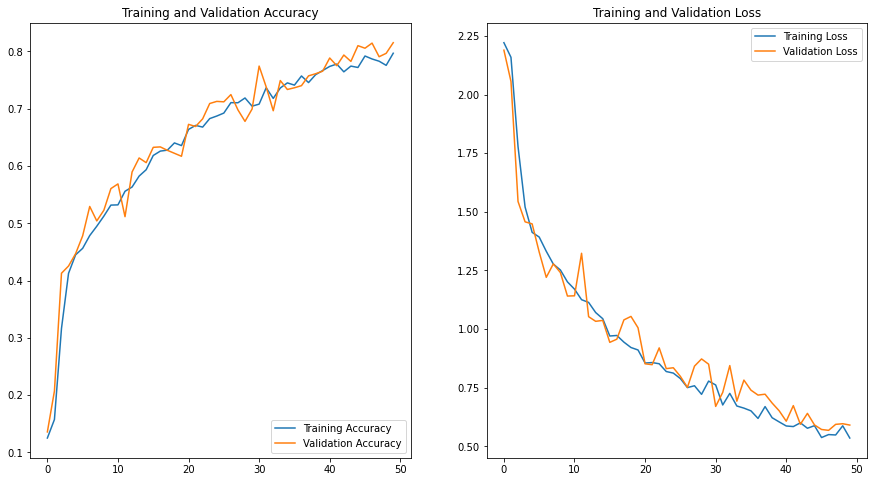

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [95]:
# saving this model for future use
model.save('gdrive/MyDrive/UpGrad/DeepLearning/CNN_Data/Models')

INFO:tensorflow:Assets written to: gdrive/MyDrive/UpGrad/DeepLearning/CNN_Data/Models/assets


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## Todo: analysis

In [95]:
Model accuracy and loss seem to have improved as compared to the previous model. No overfitting heere 
train accuracy is  0.77 and validation accuracy is 0.75
This might have been because of the imbalanced dataset. We cured it by normalizing the number of samples which we did with the help of Augmentor package

In [96]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [97]:
model.evaluate(test_ds)

4/4 [==============================] - 40s 114ms/step - loss: 4.4265 - accuracy: 0.3814


[4.426543712615967, 0.3813559412956238]

Just 38% accuracy on the test data set. Could be because of the data not being of a distribution similar to that of train data set. 
